# Rational Method
For small to medium size catchments, one of the most common design problem is **peak flood estimation**, which can be used to sizing hydraulic structures, such as conduits and culverts. One of the methods to solve this problem is the **Rational method**, which has been used over 100 years. More details can be found in this [link](https://www.mainroads.wa.gov.au/technical-commercial/technical-library/road-traffic-engineering/drainage-waterways/design-flows/the-rational-method/#:~:text=The%20Rational%20Method%20expresses%20a,Method%20for%20nearly%20100%20years.).
With the help of this package, you can:
* Compute *time of concentration* 
* Compute *peak flood* when *time of concentration* is given.
* Compute the critical time that the *peak flood* occurs, which means the *time* equals to *time of concentration*.

In [1]:
from hydrology import Runoff as rof
from hydrology.Runoff import RationalMethod

A typical process to compute the *peak flood*.

In [2]:
# Relationship between time and rainfall intensity. This
#  is usually provided by the professor.
def rainfall(t):
    # t: min
    i = (2880) / (t+12)
    return i

# Create Rational method solver by providing catchment area and runoff coefficient
rm1 = RationalMethod(c=0.6, area=0.12)
# Add additional catchment properties
rm1.n = 0.03  # roughness coefficient
rm1.slope = 0.01 # m/m
rm1.L = 120  # meter
# compute time of concertation, at which the peak flood occurs
rm1.tc = rm1.critical_time(rainfallFunc=rainfall)
intensity = rainfall(t=rm1.tc)
peakFlood = rm1.flow(intensity=intensity)
print('The peak flood is %.2f m^3/s %.2f min appeared after the start.'%(peakFlood, rm1.tc))

The peak flood is 2.85 m^3/s 8.19 min appeared after the start.


Compute *time of concentration (tc)* is not a easy task, so sometimes professors provide its value for you. It should be noted that the peak flow computed by *tc* provided by your professor is usually smaller because the *tc* is slightly adjusted for ease of your computation, which means it is not the optimal one.

In [3]:
# Create Rational method solver by providing catchment area and runoff coefficient
rm1 = RationalMethod(c=0.6, area=0.12)
# Assign time of concentration if it is given
rm1.tc = 24 # time of concentration provided by your professor
# compute peak flow 
intensity = rainfall(t=rm1.tc)
peakFlood = rm1.flow(intensity=intensity)
print('The peak flood is %.2f m^3/s %.2f min appeared after the start.' %
      (peakFlood, rm1.tc))


The peak flood is 1.60 m^3/s 24.00 min appeared after the start.


If several catchments are considered at the same time, the **partial area effect** should be take into consideration. The critical time of concentration should be determined by plotting.

[1.5999999999999999, 2.666666666666667, 3.866666666666667]

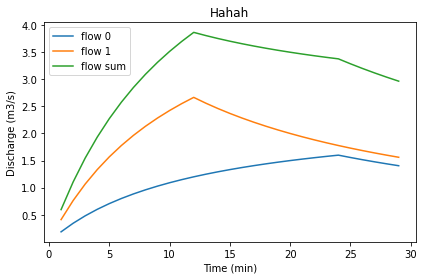

In [4]:
rm1 = RationalMethod(c=0.6, area=0.12)
rm1.tc = 24
rm2 = RationalMethod(c=0.8, area=0.1)
rm2.tc = 12

times = list(range(1, 30))
flow1 = [rm1.flow_partial(rainfall(t), t)for t in times]
flow2 = [rm2.flow_partial(rainfall(t), t)for t in times]
peaks = rof.plot_flows(times, [flow1, flow2])
peaks

The result indicates that critical *time of concentration* under the partial area effect is 12 min, and the corresponding peak flood is 3.87 m3/s.